# Let's draw some trends

# Get dataframe

In [1]:

import copy
import sys
from typing import Dict, List, Tuple
from pandas import DataFrame, to_datetime, Series

from freqtrade import (DependencyException, OperationalException, exchange, persistence)
from freqtrade.arguments import Arguments
from freqtrade.configuration import Configuration
from freqtrade.analyze import Analyze
from freqtrade.exchange import get_ticker_history
from freqtrade.logger import Logger
from freqtrade.persistence import Trade, Pair
from freqtrade.optimize import load_tickerdata_file

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

pair = "ETH/BTC"
timeframes = ['1m']

# timeframe = 1000

sysargv=['-s', 'trend001', '-c', '../config_testing.json']

arguments = Arguments(
    sysargv,
    'Simple High Frequency Trading Bot for crypto currencies'
)
args = arguments.get_parsed_arg()

# Initialize all modules
configuration = Configuration(args)
config = configuration.get_config()
analyze = Analyze(config)

logger = Logger(name=__name__, level=config.get('loglevel')).get_logger()

persistence.init(config)
exchange.init(config)

interval = analyze.get_ticker_interval()


def get_df(pair: str, interval: str) -> DataFrame:
    """
    Calculates current signal based several technical analysis indicators
    :param pair: pair in format ANT/BTC
    :param interval: Interval to use (in min)
    :return: (Buy, Sell) A bool-tuple indicating buy/sell signal
    """
    print('interval : ',interval)
    
    
    ticker_hist = get_ticker_history(pair, interval)
#     ticker_hist = load_tickerdata_file('../freqtrade/tests/testdata/', pair, interval)
#     print (ticker_hist)
#     print (ticker_hist)
    if not ticker_hist:
        logger.warning('Empty ticker history for pair %s', pair)
        return None

    try:
        dataframe = analyze.analyze_ticker(ticker_hist, pair= pair)
    except ValueError as error:
        logger.warning(
            'Unable to analyze ticker for pair %s: %s',
            pair,
            str(error)
        )
        return None
    except Exception as error:
        logger.exception(
            'Unexpected error when analyzing ticker for pair %s: %s',
            pair,
            str(error)
        )
        return None
    
    return dataframe


dfs = {}
for t in timeframes:
    dfs[t] = get_df(pair=pair, interval=t)


# whitelist = copy.deepcopy(config['exchange']['pair_whitelist'])

# for _pair in whitelist:
#     df = get_df(pair=_pair, interval=interval)
# #     print (df)
#     pivots = peak_valley_pivots(df.close.values, 0.02, -0.01)
#     print (pivots)
#     plot_pivots(df.close, pivots)
#     df[pivots] = pivots
#     gentrends(df)
#     print (df.head())



# pair_obj = Pair.query.filter(Pair.pair.is_(pair)).first()

# if pair_obj == None:
#     pair_obj = Pair(
#         pair=pair
#     )
#     Pair.session.add(pair_obj)
    
#     # trend = get_trend(pair, 30)
#     # # Not in downtrend in the last 24hrs
#     # if trend != 1:
#     #     sanitized_whitelist.remove(pair)
#     Pair.session.flush()


# ZigZag

# This is inside your IPython Notebook
import pyximport
pyximport.install(reload_support=True)
# from freqtrade.vendor.zigzag import *
from zigzag import *

# Plots

def plot_pivots(X, pivots):
    plt.xlim(0, len(X))
    plt.ylim(X.min()*0.99, X.max()*1.01)
    plt.plot(np.arange(len(X)), X, 'k:', alpha=0.2)
    plt.plot(np.arange(len(X))[pivots != 0], X[pivots != 0], 'k-')
    plt.scatter(np.arange(len(X))[pivots == 1], X[pivots == 1], color='k', alpha=0.3)
    plt.scatter(np.arange(len(X))[pivots == -1], X[pivots == -1], color='k', alpha=0.3)
#     plt.show()
    pass

from scipy import linspace, polyval, polyfit, sqrt, stats, randn
from pylab import plot, title, show , legend
from freqtrade.indicators import in_range
# import operator

# def get_tests(df, trend_name):
#     t_r = df.loc[in_range(df['high'],df[trend_name], 0.00001) | in_range(df['low'],df[trend_name], 0.00001)]
#     return t_r



2018-05-02 11:14:30,836 - freqtrade.configuration - INFO - Using config: ../config_testing.json ...
2018-05-02 11:14:30,838 - freqtrade.configuration - INFO - Validating configuration ...
2018-05-02 11:14:30,841 - freqtrade.configuration - INFO - Log level set at 20
2018-05-02 11:14:30,842 - freqtrade.configuration - INFO - Using max_open_trades: 50 ...
2018-05-02 11:14:30,843 - freqtrade.configuration - INFO - Parameter --datadir detected: freqtrade/tests/testdata ...
2018-05-02 11:14:30,845 - freqtrade.strategy.strategy - INFO - Load strategy class: DefaultStrategy (user_data.strategies.trend001.py)
2018-05-02 11:14:30,857 - freqtrade.exchange - INFO - Instance is running with dry_run enabled
2018-05-02 11:14:30,859 - freqtrade.exchange - INFO - Using Exchange "Bittrex"
2018-05-02 11:14:30,863 - requests.packages.urllib3.connectionpool - INFO - Starting new HTTPS connection (1): bittrex.com


interval :  1m


In [2]:

def gentrends(df, charts=True, pair='default_filename_plot'):

    h = df.loc[df['pivots']==1]
    l = df.loc[df['pivots']==-1]

    trend_h = []
    tests = 20
#     trends_strength = {}

    for i in range(0, len(h)-1):

        ax = h.index[i]
        ay = h.iloc[i].close
#         print ('a', ax, ay)
        bx = h.index[i+1]
        by = h.iloc[i+1].close
        t = df.index[ax:]
        trend_name = str(ax)+'-'+str(bx)

        slope, intercept, r_value, p_value, std_err = stats.linregress([ax, bx], [ay, by])
        trend_h = polyval([slope,intercept],t)
        df.loc[h.index[i]:,trend_name] = trend_h
        print (df)z
        
#         t_r = get_tests(df, trend_name)
        
#         if len(t_r) > tests:
#             plt.plot(t, trend_h, 'r', label='fitted line', alpha=0.5)
#             for it in range(0, len(t_r)):
#                 plt.scatter(t_r.index[it], t_r.iloc[it].high, color='c')


        next_waves = df.loc[df['pivots']==1][i+1:]
#         print ('point A: ', ax, 'c: ', ay, '-------------------------------------------------')
        for ib in range(0, len(next_waves)):
            bx = next_waves.index[ib]
            by = next_waves.iloc[ib].close

#             print(df[df.high > df ])

#             print ('\t\tpoint B: ', bx, 'c: ', next_waves.iloc[ib].close, 'trend_point: ', df.loc[bx][trend_name])

            if by > df.loc[bx][trend_name]:
                t = df.index[h.index[i]:]
                slope, intercept, r_value, p_value, std_err = stats.linregress([ax, bx], [ay, by])
                trend_next_wave = polyval([slope,intercept],t)
                trend_name = 'trend_'+str(ax)+'-'+str(bx)
                df.loc[h.index[i]:,trend_name] = trend_next_wave
                plt.plot(t, trend_next_wave, 'r', label='fitted line', alpha=0.3)
#                 t_r = get_tests(df, trend_name)
#                 if len(t_r) > tests:
#                     plt.plot(t, trend_next_wave, 'r', label='fitted line', alpha=0.5)
#                     for it in range(0, len(t_r)):
#                         plt.scatter(t_r.index[it], t_r.iloc[it].high, color='c')



        
    for i in range(0, len(l)-1):

        ax = l.index[i]
        ay = l.iloc[i].close
#         print ('a', ax, ay)
        bx = l.index[i+1]
        by = l.iloc[i+1].close
        t = df.index[ax:]
        trend_name = str(ax)+'-'+str(bx)

        slope, intercept, r_value, p_value, std_err = stats.linregress([ax, bx], [ay, by])
        trend = polyval([slope,intercept],t)
        plt.plot(t, trend, 'g', label='fitted line', alpha=0.5)
        df.loc[l.index[i]:,trend_name] = trend

        plt.scatter(ax, ay, color='r')
        plt.scatter(bx, by, color='r')

        next_waves = l[i+1:]
        for ib in range(0, len(next_waves)):
            bx = next_waves.index[ib]
            if next_waves.iloc[ib].close < df.loc[bx][trend_name]:
                t = df.index[l.index[i]:]
                bx = next_waves.index[ib]
                by = next_waves.iloc[ib].close
                slope, intercept, r_value, p_value, std_err = stats.linregress([ax, bx], [ay, by])
                trend_next_wave = polyval([slope,intercept],t)
                trend_name = 'trend_'+str(ax)+'-'+str(bx)
                df.loc[l.index[i]:,trend_name] = trend_next_wave
                plt.plot(t, trend_next_wave, 'g', label='fitted line', alpha=0.3)

    plt.plot(df.close, 'k', alpha=0.5)

from math import sqrt


#     timeframe_volat = {
#                     '1d':0.02,
#                     '1h':0.015,
#                     '5m':0.008,
#                     '1m':0.005}

timeframe_volat = {
                '1d':0.001,
                '1h':0.0009,
                '5m':0.0006,
                '1m':0.0005}

for t in timeframes:

    df_long = dfs[t]
    timeframe = 510
    df = df_long
#     volat = sqrt(df['stddev'].mean()) * timeframe_volat[t]
#     print (volat)
#     volat = timeframe_volat[t]

#     df['pct_change'] = df.close.pct_change()
    df['high'] = np.log(df.high)
    df['close'] = np.log(df.close)
    df['open'] = np.log(df.open)
    df['low'] = np.log(df.low)
    df['bb_exp'] = (df.bb_upperband - df.bb_lowerband) /

    pivots = peak_valley_pivots(df.close.values, df.stddev.values)
    df['pivots'] = np.transpose(np.array((pivots)))
    plt.figure(num=0, figsize=(50,10))

    # eje y en log scale

#     plt.yscale('log')
    plot_pivots(df.close, pivots)


    gentrends(df)
    legend(['pivots','trend', 'close'])
    plt.show()

SyntaxError: invalid syntax (<ipython-input-2-e51f51046232>, line 24)

In [ ]:
%history


# generate trend lines

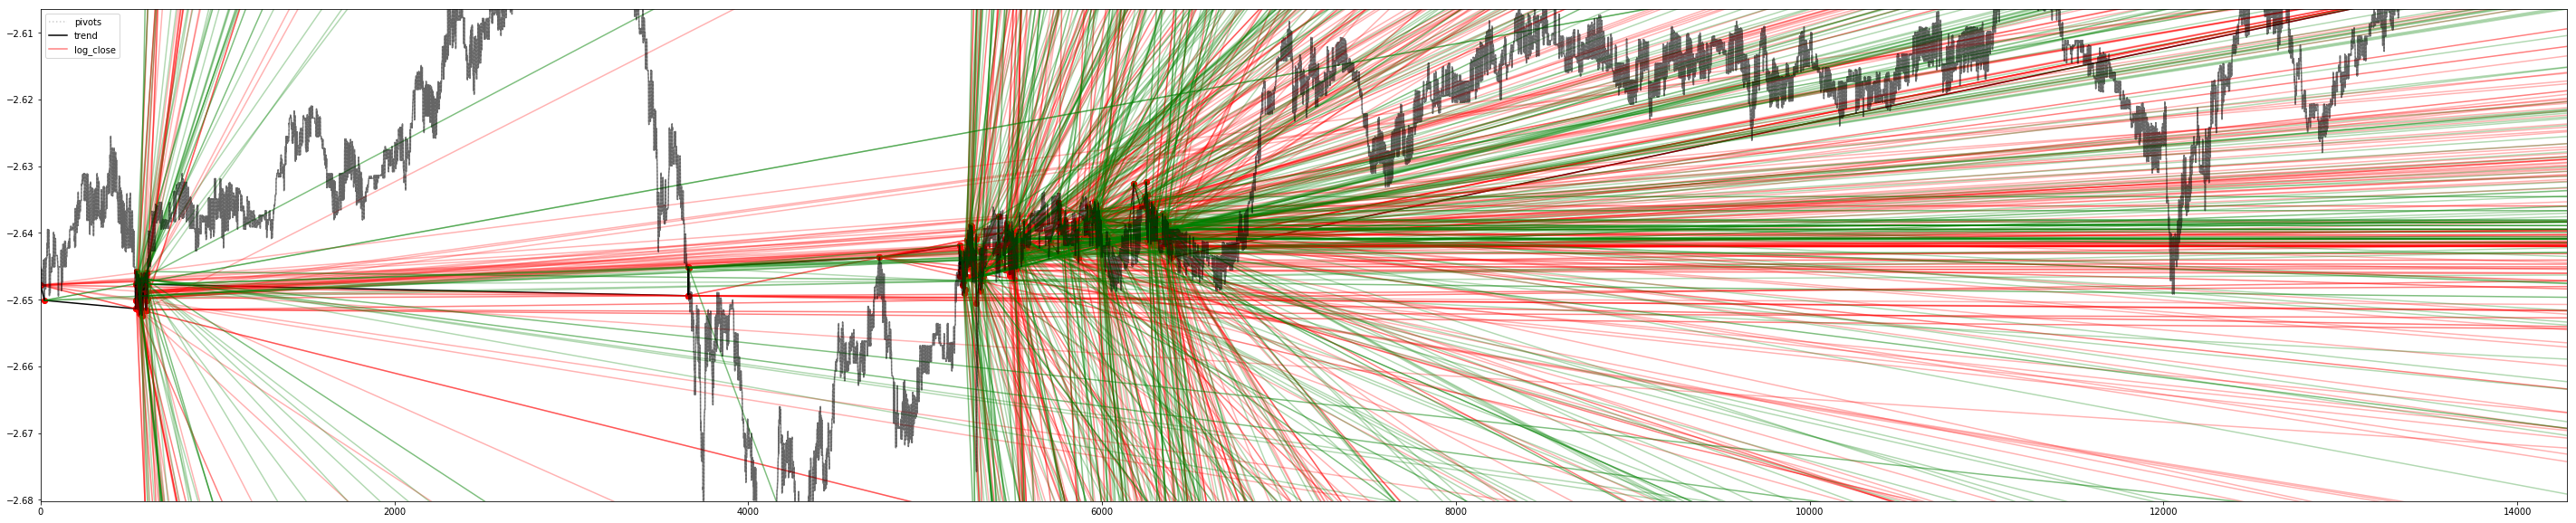

In [4]:
from scipy import linspace, polyval, polyfit, sqrt, stats, randn
from pylab import plot, title, show , legend


def gentrends(df, charts=True, pair='default_filename_plot'):

    h = df.loc[df['pivots']==1]
    l = df.loc[df['pivots']==-1]

    trend_h = []


    for i in range(0, len(h)-1):

        ax = h.index[i]
        ay = h.iloc[i].log_close
#         print ('a', ax, ay)
        bx = h.index[i+1]
        by = h.iloc[i+1].log_close
        t = df.index[ax:]
        trend_name = str(ax)+'-'+str(bx)

        slope, intercept, r_value, p_value, std_err = stats.linregress([ax, bx], [ay, by])
        trend_h = polyval([slope,intercept],t)
        plt.plot(t, trend_h, 'r', label='fitted line', alpha=0.5)
        df.loc[h.index[i]:,trend_name] = trend_h

        plt.scatter(ax, ay, color='r')
        plt.scatter(bx, by, color='r')


        next_waves = h[i+1:]
        
#         print (len(h.loc[h.close >= df[h.index]]))
#         for ib in range(0, len(next_waves)):
#         for index, row in next_waves.loc[(next_waves.high >= next_waves[trend_name])].iterrows():
# #             print(row.high)
#             if row.high > row[trend_name]:
# #                 print(row.high)
#                 plt.scatter(index, row.high, color='c')
        
#         print ('point A: ', ax, 'c: ', ay, '-------------------------------------------------')
        for ib in range(0, len(next_waves)):
            bx = next_waves.index[ib]
            by = next_waves.iloc[ib].log_close
            trend_tests = 0
            
#             print(df[df.high > df ])

#             print ('\t\tpoint B: ', bx, 'c: ', next_waves.iloc[ib].log_close, 'trend_point: ', df.loc[bx][trend_name])

            if by > df.loc[bx][trend_name]:
                t = df.index[h.index[i]:]
                slope, intercept, r_value, p_value, std_err = stats.linregress([ax, bx], [ay, by])
                trend_next_wave = polyval([slope,intercept],t)
                trend_name = 'trend_'+str(ax)+'-'+str(bx)
                df.loc[h.index[i]:,trend_name] = trend_next_wave
                plt.plot(t, trend_next_wave, 'r', label='fitted line', alpha=0.3)


    for i in range(0, len(l)-1):

        ax = l.index[i]
        ay = l.iloc[i].log_close
#         print ('a', ax, ay)
        bx = l.index[i+1]
        by = l.iloc[i+1].log_close
        t = df.index[ax:]
        trend_name = str(ax)+'-'+str(bx)

        slope, intercept, r_value, p_value, std_err = stats.linregress([ax, bx], [ay, by])
        trend = polyval([slope,intercept],t)
        plt.plot(t, trend, 'g', label='fitted line', alpha=0.5)
        df.loc[l.index[i]:,trend_name] = trend

        plt.scatter(ax, ay, color='r')
        plt.scatter(bx, by, color='r')

        next_waves = l[i+1:]
        for ib in range(0, len(next_waves)):
            bx = next_waves.index[ib]
            if next_waves.iloc[ib].log_close < df.loc[bx][trend_name]:
                t = df.index[l.index[i]:]
                bx = next_waves.index[ib]
                by = next_waves.iloc[ib].log_close
                slope, intercept, r_value, p_value, std_err = stats.linregress([ax, bx], [ay, by])
                trend_next_wave = polyval([slope,intercept],t)
                trend_name = 'trend_'+str(ax)+'-'+str(bx)
                df.loc[l.index[i]:,trend_name] = trend_next_wave
                plt.plot(t, trend_next_wave, 'g', label='fitted line', alpha=0.3)

    plt.plot(df.log_close, 'k', alpha=0.5)

from math import sqrt


#     timeframe_volat = {
#                     '1d':0.02,
#                     '1h':0.015,
#                     '5m':0.008,
#                     '1m':0.005}

timeframe_volat = {
                '1d':0.001,
                '1h':0.0009,
                '5m':0.0006,
                '1m':0.0005}

for t in timeframes:

    df_long = dfs[t]
    timeframe = 510
    df = df_long
#     volat = sqrt(df['stddev'].mean()) * timeframe_volat[t]
#     print (volat)
    volat = timeframe_volat[t]

#     df['pct_change'] = df.close.pct_change()
    df['log_close'] = np.log(df.close)
    df['bb_exp'] = (df.bb_upperband - df.bb_lowerband)
    
    pivots = peak_valley_pivots(df.log_close.values, volat, -volat)
    df['pivots'] = np.transpose(np.array((pivots)))
    plt.figure(num=0, figsize=(50,10))
    
    # eje y en log scale
    
#     plt.yscale('log')
    plot_pivots(df.log_close, pivots)


    gentrends(df)
    legend(['pivots','trend', 'log_close'])
    plt.show()


In [ ]:
s = DataFrame([2, 6, 4, 8, 6, 3,12], columns=["numbers"])
print (s)
slope, intercept, r_value, p_value, std_err = stats.linregress([1,6], [3,8])
plt.plot(, 'r', label='fitted line')
plt.plot(s)

In [ ]:
print (df.head())
indices = np.flatnonzero(df['pivots'] == 1)

In [ ]:

from math import pow
pow(2,2)

In [ ]:

# def parser(x):
# 	return datetime.strptime('190'+x, '%Y-%m')

short_df = df['close'][-timeframe:]
short_pivots = pivots[:timeframe]
def price_pivots (row):
   if row['pivots'] != 0 :
      return row['close']
   else:
      return 0
    
df['pivots_price'] = df.apply(lambda row: price_pivots(row), axis=1)

short_pivots_price = df['pivots_price'][-timeframe:]
print(len(df))
print(len(short_pivots))


# degraph
plot_pivots(short_df, short_pivots)
# plt.plot(short_pivots_price)
# plt.show()
# plt.plot(short_pivots)
series = short_df
X = series.values
diff = list()
for i in range(1, len(X)):
	value = X[i] - X[i - 1]
	diff.append(value)
plt.plot(diff)
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

# fit linear model
X = [i for i in range(0, len(series))]
X = np.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
plt.plot(y)
plt.plot(trend)
plt.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
plt.plot(detrended)
plt.show()

# LinearRegression example

In [ ]:
from scipy import linspace, polyval, polyfit, sqrt, stats, randn
from pylab import plot, title, show , legend

#Linear regression example
# This is a very simple example of using two scipy tools 
# for linear regression, polyfit and stats.linregress

#Sample data creation
#number of points 
# n=50
# t=linspace(-5,5,n)
# #parameters
# a=2; b=-4
# x=polyval([a,b],t)
# #add some noise
# xn=x+randn(n)

df = dfs['1d']
t = df.index
x = xn = df.close
# print (x)
# print (xn)

#Linear regressison -polyfit - polyfit can be used other orders polys
# (ar,br)=polyfit(t,xn,1)

(ar,br,r,tt,stderr)=stats.linregress(t,xn)
xr=polyval([ar,br],t)
#compute the mean square error
# err=sqrt(sum((xr-xn)**2)/n)

# print('Linear regression using polyfit')
# print('parameters: a=%.2f b=%.2f \nregression: a=%.2f b=%.2f, ms error= %.3f' % (a,b,ar,br,err))

#matplotlib ploting
title('Linear Regression Example')
plot(t,x,'g.--')
plot(t,xn,'k.')
plot(t,xr,'r.-')
legend(['original','plus noise', 'regression'])

show()

#Linear regression using stats.linregress
(a_s,b_s,r,tt,stderr)=stats.linregress(t,xn)
# print('t: ', t)
# print('xn: ', xn)
print('Linear regression using stats.linregress')
print('parameters: a=%.2f b=%.2f \nregression: a=%.2f b=%.2f, std error= %.3f' % (a,b,a_s,b_s,stderr))

In [ ]:
p = np.poly1d([2, 2, 3])
print(np.poly1d(p))
p(3)

In [ ]:
# import scipy
from scipy import polyval, stats

# use scipy polyval to create y-values from x_data and the 
# linregress fit parameters

# df = df.tail(10)
fit_output = stats.linregress([5, 6], [0.0000106, 0.00007])
slope, intercept, r_value, p_value, slope_std_error = fit_output
print(slope, intercept)

scipy_fitted_y_vals = polyval([slope,intercept],[0.00006, 0.00007]) 
import matplotlib.pyplot as plt
# axes = df.plot(x="date", y="price", kind="scatter", color="red")
plt.plot(df.index, scipy_fitted_y_vals, color='black', linewidth=3)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

bill = [34, 1000]
tip =  [5, 6]  
plt.scatter(bill, tip)
plt.scatter([10, 200, 354, 635], [3, 5, 6, 8])

#fit function
# f = lambda x: 0.1462*x - 0.8188
# x values of line to plot
#fit function
a, b = np.polyfit(np.array(bill), np.array(tip), deg=1)
f = lambda x: a*x + b

x = np.array([0,100])
# plot fit
plt.plot(x,f(x),lw=2.5, c="k",label="fit line between 0 and 100")

#better take min and max of x values
x = np.array([min(bill),max(bill)])
plt.plot(x,f(x), c="orange", label="fit line between min and max")

plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

h = df.high
l =  df.low 
# plt.scatter(h, l)
plt.scatter(df.index, df.close)

#fit function
# f = lambda x: 0.1462*x - 0.8188
# x values of line to plot
#fit function
a, b = np.polyfit(np.array(h), np.array(l), deg=1)
f = lambda x: a*x + b

# x = np.array([0,100])
# # plot fit
# plt.plot(x,f(x),lw=2.5, c="k",label="fit line between 0 and 100")

#better take min and max of x values
x = df.index
plt.plot(x,f(x), c="orange", label="fit line between min and max")

plt.legend()
plt.show()